# 1. Hensikt


Lage en enkel modell som kalkulerer temperaturen på jordkloden. Gjenskape enkel klimamodellerinng

# 2. Teori

Stefan-Boltzmanns lov

$S=\sigma T^4$

Stefan-Boltzmanns lov sier at alle gjenstander som har en temperatur over absolutt nullpunkt vil utgi varmestråling. En kan beregne varmestrålingen som legmet sender ut når en kjenner gjennstandens temperatur og areal. Den er skrevet over, der S er strålingen per kvadratmeter (w/m^2), T er temperatur målt i kelvin og 𝜎 er Stefan-Boltzmanns konstant som er lik 5.6703*(10^-8)

Gjennomsnittlig elektromagnetisk stråling

$S_0 = \large\frac{{radius_{sun}}^2}{{distanse_{jord\space sol}}^2} \cdot stråling\space sol$

Solkonstanten er målt gjennomsnittlig elektromagnetisk stråling fra solen som treffer vertikalt på jordklodens atmosfære. Denne konstanten er målt til 1361 W/(m^2). Kalkulasjonen for denne konstanten ligger over.

Energiprinsippet

Energi er konstant. Den kan ikke skapes, eller tilintetgjøres. Vi ser på jordkloden som et lukket system som blir tilført varmestråling fra solen og så sender ut varmestråling til verdensrommet. Dette gir tre muligheter:

1. Mer stråling blir sendt ut. Planeten blir kaldere over tid.

2. Mer stråling blir tilført. Planeten blir varmere over tid.

3. Stråling inn = Stråling ut. Temperaturen på planeten er konstant.

Forenklet atmosfære

Jordkloden har en atmosfære som gjør at temperaturen på jordkloden blir varmere en den egentlig skal være. Denne temperaturen ligger rundt 15 C. I en klimamodell kan vi gjøre noen antagelser, som ikke er helt sanne, for å komme til et forenklet utrykk for atmosfæren.

1. Atmosfæren har en konstant temperatur.
2. Atmosfæren er fullstendig gjennomsiktig for stråling fra solen.
3. Atmosfæren tar imot all strålin fra jorden.

# Oppgave 1

Lag et program som kalkulerer gjennomsnittlig varmestråling som treffer vertikalt på jordklodens atomsfære. Formelen tar solkonstanten, altså elektromagnetisk stråling ved sola, og ganger det med kvadratet av radiusen av sola, delt på kvadratet av avstanden mellom sola og jorda. Dette er fordi den samme mengden elektromagnetisk stråling ved sola blir spredt utover et større område når den når jordkloden så det er mindre stråling som faktisk når jordkloden.

In [102]:
from pylab import *

stefan = 5.67e-8 #Stefann-Boltzmankonstanten

soltemperatur = 5778 #Kelvin 
soldiameter = 1391016e3 #meter
avstandsol_jord = 149600000e3 #meter
jordradius = 6371e3 #meter
albedo = 0.3

#Bruker stefanns-boltzmanns lov til å regne ut en solkonstant
solstråling = stefan*(soltemperatur**4)
#Bruker så Stefan-Boltzmanns lov til å regne ut mengden energi som treffer toppen av atmosfæren.
s0 = (((soldiameter/2)**2)/(avstandsol_jord**2))*solstråling
print(s0)

1365.948361181013


# Oppgave 2

Vi tenker på energiprinsippet som sier at energi er konstant, og kan ikke skapes eller forsvinne. Derfor må den bli overført. I vår modell tenker vi at stråling inn er lik stråling ut. Dette er formler som hjelper oss med dosse målingene.

Energien som treffer planeten er:
$E_{inn} = K_s \cdot \pi R{_E}^2$

Energien som går inn i systemet er:
$E_{absorbert} = K_s \cdot (1 - albedo) \cdot \pi R{_E}^2$

Energien som går ut av systemet er:
$E_{emittert} = \sigma T^4 \cdot 4\pi R{_E}^2$

På grunn av energiprinsippet tenker vi oss at: 
$E_{absorbert}= E_{emittert}$

$K_s \cdot (1 - albedo) \cdot \pi R{_E}^2 = \sigma T^4 \cdot 4\pi R{_E}^2$
Blir til: 
$T = \sqrt[4]{\frac{K_s\cdot(1-albedo)}{4\sigma}}$

In [103]:
temperatur = ((s0*(1-albedo))/(4*stefan))**(1/4)
temperatur = temperatur - 273.15

# Diskusjon
Dette blir gjennomsnittstemperaturen på Jorda, hvis en ikke tenker på at jorda har en atmosfære rundt seg. Det er derfor vi fikk -18 istedenfor +15. Vi antar at jordkloden er flat, siden fra solas perspektiv så kan en tenke området der sola treffer jorda som en flat sirkel. 

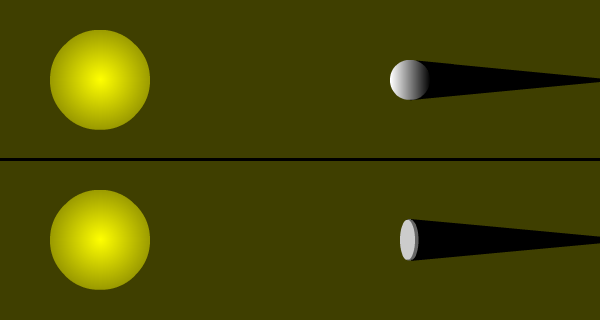 


# Oppgave 3

Vi skal legge til atmosfæren til modellen, og vi må gjøre en del antagelser og forenklinger. Vi antar 3 ting, som ikke nødvendigvis er sant.

1. Atmosfæren har en konstant temperatur. Vil gjøre atmosfæren til en stor blokk med konstant temperatur.
2. Atmosfæren er fullstendig gjennomsiktig for stråling fra solen. Dette betyr at all stråling fra Sola treffer jorden.
3. Atmosfæren tar imot all stråling fra jorden. 

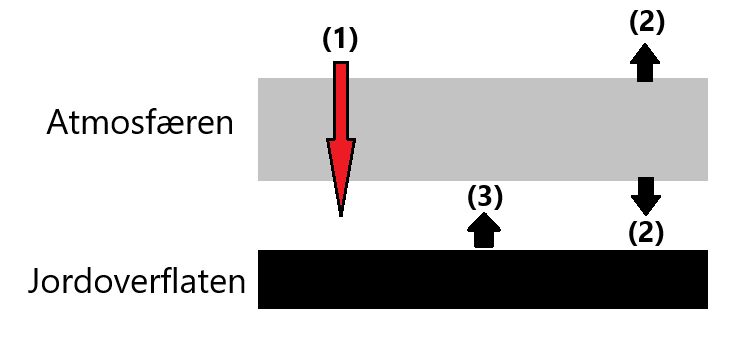

$\space s_0\cdot(1-albedo) = \sigma T_{a}^4$
Denne likningen gir oss gjennomsnittstemperaturen til atmosfæren

$\space s_0\cdot(1-albedo) + \sigma T_{a}^4 = \sigma T_{s}^4$
Denne likningen forteller oss om gjennomsnittstemperaturen på jordkloden.

# Diskusjon
Vi tar solkonstanten s0 og ganger den med en prosentandellen av strålingen som faktisk gå igjennom atmosfæren, for å finne gjennomsnittsenergien som treffer og går igjennom atmosfæren, og i den andre likningen tar vi den energien og adderer den med seg selv igjen for å lage en tilnærming av hvor mye energi som treffer jordkloden hvis en tar med strålingen fra Sola og den som atomsfæren absorberer og sender tilbake til jordkloden. 

In [104]:
s0 = s0/4
temperatur = ((2*(s0)*(1-albedo))/stefan)**(1/4)
print(round(temperatur), "er gjennomsnittstemperaturen i kelvin")
temperatur = temperatur - 273.15
print(round(temperatur), "er gjennomsnittstemperaturen i grader")

303 er gjennomsnittstemperaturen i kelvin
30 er gjennomsnittstemperaturen i grader


# Diskusjon
Vi deler solkonstanten på 4 for å finne en gjennomsnittstemperatur som er mer realistisk. Dette er for å simulere dag og nattsykluser og at jorden egentlig er en kule. Vi får at gjennomsnittstemperaturen ligger rundt 30 grader. I virkeligheten er dette dobbelt så stort den målte gjennomsnittstemperaturen.

# Oppgave 4

Atmosfæren tar ikke opp all energien som jordkloden sender ut, og all varmestråling fra solen går ikke direkte igjennom atmosfæren. Vi kan forandre modellen, ved å forandre albedoen slik at den gir oss et mer nyansert bilde av hvor mye av strålingen som blir absorbert av atmosfæren samt hvor mye av strålingen jordkloden sender ut som ikke blir tatt opp.  

In [105]:
albedo = 0.43
temperatur = ((2*(s0)*(1-albedo))/stefan)**(1/4)
print(round(temperatur), "er gjennomsnittstemperaturen i kelvin")
temperatur = temperatur - 273.15
print(round(temperatur), "er gjennomsnittstemperaturen i grader")

288 er gjennomsnittstemperaturen i kelvin
15 er gjennomsnittstemperaturen i grader


# Diskusjon
Setter vi albedoen til 0.3 får vi 30 grader i gjennomsnitt som sett tidligere. Vi kan addere på denne albedoen at ikke all solstrålingen går igjennom atmosæren 0.3 + 0.06. Så kan vi addere på at noe av strålingen sendt ut av jordkloden blir absorbert. 0.3 + 0.06 + 0.07 = 0.43. Dette gir oss en modell som gir oss en gjennomsnittstemperatur som er nærme målingene, men er en stor oversimplifikasjon av problemet med atmosfæren.

# Oppgave 5

Frem til nå har vi behandlet jordkloden som et stort punkt. Prøv nå å velg et punkt på planeten, og
prøv å modellere temperaturen på dette punktet gjennom et helt år. Det vil da være enklest å velge
et punkt ved ekvator, men du står fritt til å prøve deg fram. Grunngi valgene du tar.

Hvis vi skal snakke om strålingen på et punkt av jordkloden må vi forandre på formelen:
$S_0 = \large\frac{{radius_{sun}}^2}{{distanse_{jord\space sol}}^2} \cdot stråling\space sol$

Dette er fordi at jordkloden er rund, og snurer rundt. Punktet som vi ser på er derfor ikke alltid i solyset. Den er også en lengre avstand unna sola. Jordas radius er 6371 km, og dette betyr at distansen mellom jorda og sola forandrer seg med ca 6371 km fra morgen til midt på dagen hvis vi tenker oss et punkt på ekvator og at punktet roterer slik at det på et tidspunkt er det punktet som er nærmest sola.

Derfor tenker vi oss i den videre regningen at punktet på jorda vi ser på er:
1. Er 12 timer i solyset og 12 uten solys.
2. Beveger seg slik at det midt på dagen, etter 6 timer, kommer til å være det punktet som er nærmest sola. 
3. At jordkloden snurrer på en akse som er 90 grader i forhold sola og at punktet ligger på ekvator.

Da vil punktet i gjennomsnitt gå fra å være den målte avstanden vi har brukt tidligere, til å være 6371 km nærmere midt på dagen, til å så gå 6371 km tilbake igjen. Vi antar at punkter som avskjøles har samme temperatur hele natten, siden det ville tatt store forandringer på modellen for å kunne modellere natta.

Vi kan bruke en sinusfunksjon for å modelere dag natt syklusen. Vi kan deretter kopiere denne dag nattsyklusen for å få et ganske fint bilde av hvordan temperaturen forandrer seg på en dag over et år, men dette tar ikke i beregningen at jordkloden har sesonger, som gjør at modellen kommer til å være unøyaktig. 

In [106]:
from pylab import *

stefan = 5.67e-8 #Stefann-Boltzmankonstanten
soltemperatur = 5778 #Kelvin 
soldiameter = 1391016e3 #meter
avstandsol_jord = 149600000e3 #meter
jordradius = 6371e3 #meter
albedo = 0.43

#Bruker stefanns-boltzmanns lov til å regne ut en solkonstant
solstråling = stefan*(soltemperatur**4)

#Antall timer i et år
aartimer = 365*24

#Temperaturen hver time i en dag
arrtime = zeros(aartimer)
arrtemp = zeros(aartimer)
    
for j in range(0, aartimer)
    for i in range(0, 6):
        #Bruker så Stefan-Boltzmanns lov til å regne ut mengden energi som treffer toppen av atmosfæren.
        s0 = ((((soldiameter/2)**2)/((avstandsol_jord-(1062*i))**2))*solstråling)/4
        temperatur_k = ((2*(s0)*(1-albedo))/stefan)**(1/4)
        temperatur_c = temperatur_k - 273.15
        arrtime[(i+(j)] = i
        arrtemp[(i+j)] = temperatur_c
        #print(temperatur_c, "er gjennomsnittstemperaturen i grader")
for j in range(0, aartimer-1)
    for i in range(6, 12):
        #Bruker så Stefan-Boltzmanns lov til å regne ut mengden energi som treffer toppen av atmosfæren.
        s0 = ((((soldiameter/2)**2)/((avstandsol_jord+(1062*i))**2))*solstråling)/4
        temperatur_k = ((2*(s0)*(1-albedo))/stefan)**(1/4)
        temperatur_c = temperatur_k - 273.15
        arrtime[(i+j)] = i
        arrtemp[(i+j)] = temperatur_c
        #print(temperatur_c, "er gjennomsnittstemperaturen i grader")

plot(arrtime, arrtemp)
show()

SyntaxError: invalid syntax (<ipython-input-106-4a4ceae7c36a>, line 20)

Dette forteller oss hvordan gjennomsnittstemperaturen forandrer seg veldig lite gjennom dagen, basert på disse forandringene på modellen. 

# Konklusjon

Jeg har nå modelert i forskjellig grad gjennomsnittstemperaturen på jordkloden. Til slutt endte jeg opp med en grei modell som også klarte å fortelle oss gjennomsnittstemperaturen. Når jeg skulle prøve å lage en graf hadde jeg problemer med å skape noe som modelerte stigningen og synkingen av temperaturen over dagen. Neste gang ville det kanskje være mer produktivt å bruke en sinus formel eller en annen formel for å kunne lage en bedre graf.